In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from time import time
tqdm.monitor_interval = 0
import torch
import json
import torch.nn as nn
import numpy as np
import os, sys
from time import time
sys.path.append('eval')
from forecast import *
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

In [14]:
graph_file = 'data/graphs/400950-400951_n3.json'

cuda:1


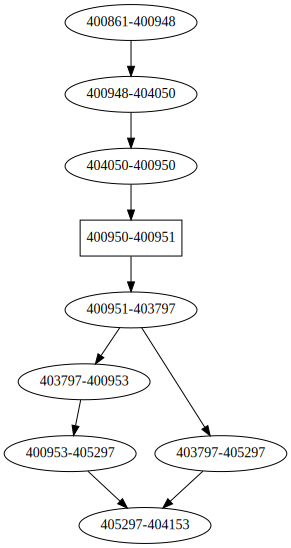

In [15]:
SROUTE, ADJ = read_graph(graph_file, 
                         verbose=False, named_adj=True)
# SROUTE, ADJ = complete_graph(SROUTE, ADJ)
graph = show_graph(SROUTE, ADJ)

DENSE = False
EPS = 16
LAG = 48 + 1
hops = int(graph_file[:-5].split('_n')[1])
# LAG = 60 + 1
STOPS = len(SROUTE)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)
graph

In [16]:
from models.temporal.RNN import *
from models.MPRNN import *
from models.Variants import *

HSIZE = 512
AUTO_ITER = hops

# model = MPRNN_FCAST(
model = MPRNN_FCAST(
    nodes=SROUTE, adj=ADJ, 
#     rnnmdl=RNN_HDN_LOSSY,
#     mpnmdl=MPN_DEEP_LOSSY,
    iters=AUTO_ITER,
    hidden_size=HSIZE, 
    single_mpn=False,
    verbose=True)

model.to(device)
model.device = device
model.hops = hops

MPRNN
 [*] Defined over: 9 nodes
 [*] Contains    : 9 adjs
MPRNN_ITER
iters: 3
indep: True
FCAST
 [*] Fringes: [8, 7]
 [*] RNN: <class 'models.Variants.RNN_HDN'>
 [*] MPN: <class 'models.MPRNN.MP_DENSE'>


In [17]:
criterion, opt, sch = model.params(lr=0.005)

In [7]:
dset = SpotHistory(SROUTE, 'train', 32, ignore_missing=True, lag=LAG, res=10).generator()
valset = SpotHistory(SROUTE, 'test', 32, ignore_missing=True, lag=LAG, res=10).generator()

Chunks (lag 49)
 [*] Segments: 90 co-avail
    * [400950-400951]: 90
    * [400951-403797]: 90
    * [404050-400950]: 90
    * [400948-404050]: 90
    * [403797-400953]: 90
    * [403797-405297]: 90
 [*] Examples (train): 1301
 [*] No missing: 1301/4008
 [*] Time range: 2014-08-01 ~ 2014-10-31
Chunks (lag 49)
 [*] Segments: 90 co-avail
    * [400950-400951]: 90
    * [400951-403797]: 90
    * [404050-400950]: 90
    * [400948-404050]: 90
    * [403797-400953]: 90
    * [403797-405297]: 90
 [*] Examples (test): 516
 [*] No missing: 516/1023
 [*] Time range: 2014-08-01 ~ 2014-10-31


In [8]:
evf = lambda: evaluate(
    valset, model, 
    crit=lambda _y, y: criterion(_y[:, :, 0], y[:, :, 0]).item())

In [9]:
best_eval = evf()

Eval loss: 9.9638           


In [10]:
# model.load_prior()
# best_eval = evf()

Transfer: /home/ubuntu/datasets-aux/checkpoints/mpfcast/400950-400951_n1.pth


RuntimeError: Error(s) in loading state_dict for MPRNN_FCAST:
	size mismatch for rnns.0.inp.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.0.inp.0.weight: copying a param of torch.Size([512, 513]) from checkpoint, where the shape is torch.Size([256, 257]) in current model.
	size mismatch for rnns.0.inp.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.0.inp.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for rnns.0.out.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.0.out.0.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for rnns.0.out.2.weight: copying a param of torch.Size([1, 512]) from checkpoint, where the shape is torch.Size([1, 256]) in current model.
	size mismatch for rnns.0.rnn.bias_hh_l0: copying a param of torch.Size([2048]) from checkpoint, where the shape is torch.Size([1024]) in current model.
	size mismatch for rnns.0.rnn.weight_hh_l0: copying a param of torch.Size([2048, 512]) from checkpoint, where the shape is torch.Size([1024, 256]) in current model.
	size mismatch for rnns.0.rnn.bias_ih_l0: copying a param of torch.Size([2048]) from checkpoint, where the shape is torch.Size([1024]) in current model.
	size mismatch for rnns.0.rnn.weight_ih_l0: copying a param of torch.Size([2048, 512]) from checkpoint, where the shape is torch.Size([1024, 256]) in current model.
	size mismatch for rnns.1.inp.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.1.inp.0.weight: copying a param of torch.Size([512, 513]) from checkpoint, where the shape is torch.Size([256, 257]) in current model.
	size mismatch for rnns.1.inp.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.1.inp.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for rnns.1.out.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.1.out.0.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for rnns.1.out.2.weight: copying a param of torch.Size([1, 512]) from checkpoint, where the shape is torch.Size([1, 256]) in current model.
	size mismatch for rnns.1.rnn.bias_hh_l0: copying a param of torch.Size([2048]) from checkpoint, where the shape is torch.Size([1024]) in current model.
	size mismatch for rnns.1.rnn.weight_hh_l0: copying a param of torch.Size([2048, 512]) from checkpoint, where the shape is torch.Size([1024, 256]) in current model.
	size mismatch for rnns.1.rnn.bias_ih_l0: copying a param of torch.Size([2048]) from checkpoint, where the shape is torch.Size([1024]) in current model.
	size mismatch for rnns.1.rnn.weight_ih_l0: copying a param of torch.Size([2048, 512]) from checkpoint, where the shape is torch.Size([1024, 256]) in current model.
	size mismatch for rnns.2.inp.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.2.inp.0.weight: copying a param of torch.Size([512, 513]) from checkpoint, where the shape is torch.Size([256, 257]) in current model.
	size mismatch for rnns.2.inp.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.2.inp.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for rnns.2.out.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for rnns.2.out.0.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for rnns.2.out.2.weight: copying a param of torch.Size([1, 512]) from checkpoint, where the shape is torch.Size([1, 256]) in current model.
	size mismatch for rnns.2.rnn.bias_hh_l0: copying a param of torch.Size([2048]) from checkpoint, where the shape is torch.Size([1024]) in current model.
	size mismatch for rnns.2.rnn.weight_hh_l0: copying a param of torch.Size([2048, 512]) from checkpoint, where the shape is torch.Size([1024, 256]) in current model.
	size mismatch for rnns.2.rnn.bias_ih_l0: copying a param of torch.Size([2048]) from checkpoint, where the shape is torch.Size([1024]) in current model.
	size mismatch for rnns.2.rnn.weight_ih_l0: copying a param of torch.Size([2048, 512]) from checkpoint, where the shape is torch.Size([1024, 256]) in current model.
	size mismatch for mpns.0.msg_op.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.0.msg_op.0.weight: copying a param of torch.Size([512, 1024]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for mpns.0.msg_op.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.0.msg_op.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for mpns.0.upd_op.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.0.upd_op.0.weight: copying a param of torch.Size([512, 1024]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for mpns.0.upd_op.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.0.upd_op.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for mpns.1.msg_op.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.1.msg_op.0.weight: copying a param of torch.Size([512, 1024]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for mpns.1.msg_op.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.1.msg_op.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for mpns.1.upd_op.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.1.upd_op.0.weight: copying a param of torch.Size([512, 1024]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for mpns.1.upd_op.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.1.upd_op.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for mpns.2.msg_op.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.2.msg_op.0.weight: copying a param of torch.Size([512, 1024]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for mpns.2.msg_op.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.2.msg_op.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.
	size mismatch for mpns.2.upd_op.0.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.2.upd_op.0.weight: copying a param of torch.Size([512, 1024]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for mpns.2.upd_op.2.bias: copying a param of torch.Size([512]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for mpns.2.upd_op.2.weight: copying a param of torch.Size([512, 512]) from checkpoint, where the shape is torch.Size([256, 256]) in current model.

In [11]:
train_mse = []
eval_mse = []
eval_mape = []

LR 0.001


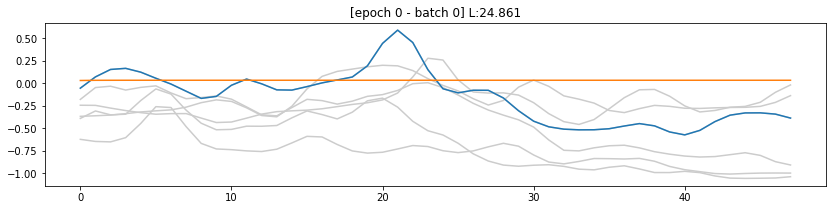

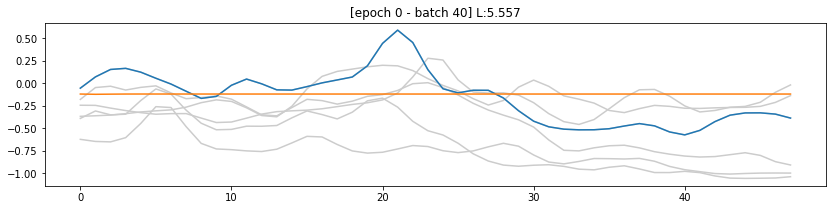

[1/16 : 41/41] - L5.95 (avg 11.51  40.5s)  
Eval loss: 8.3460          
LR 0.001


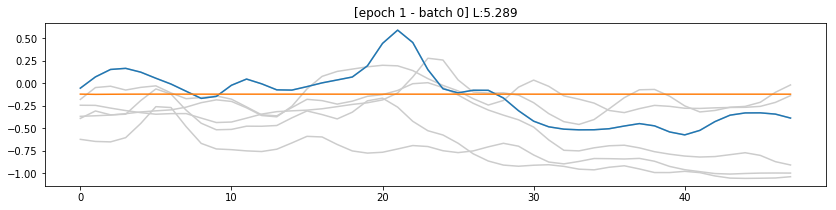

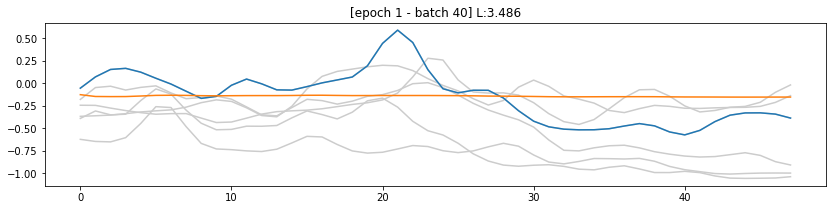

[2/16 : 41/41] - L3.99 (avg 4.25  40.6s)  
Eval loss: 9.0526           
LR 0.001


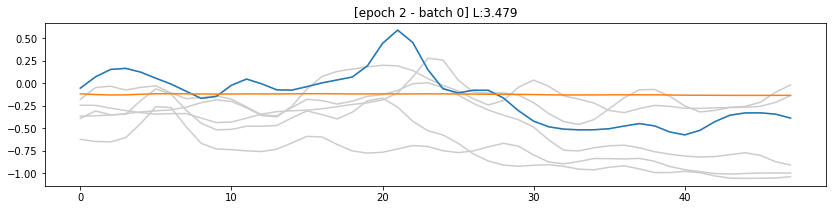

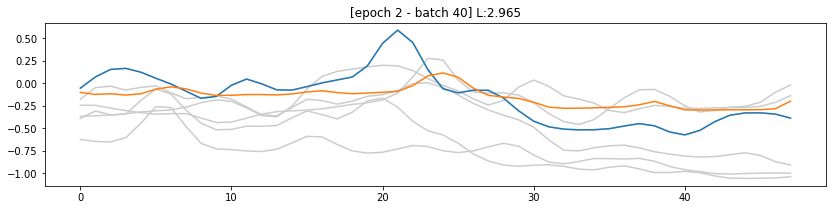

[3/16 : 41/41] - L2.88 (avg 3.00  40.2s)  
Eval loss: 92.4514           
LR 0.001


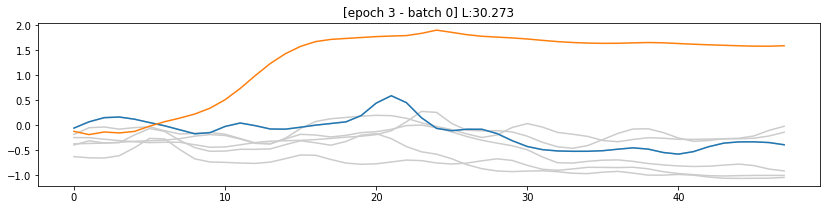

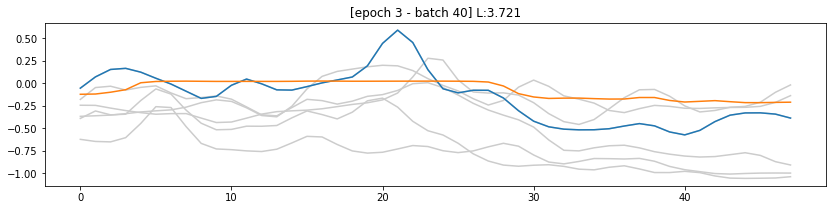

[4/16 : 41/41] - L2.93 (avg 5.07  40.6s)  
Eval loss: 7.4046           
LR 0.001


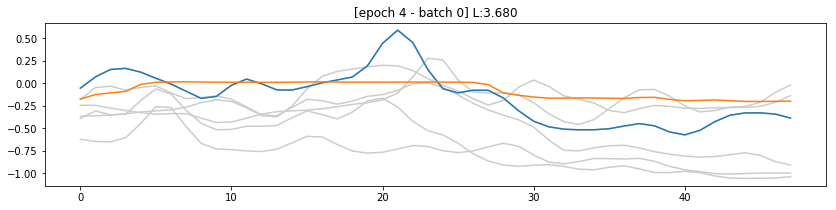

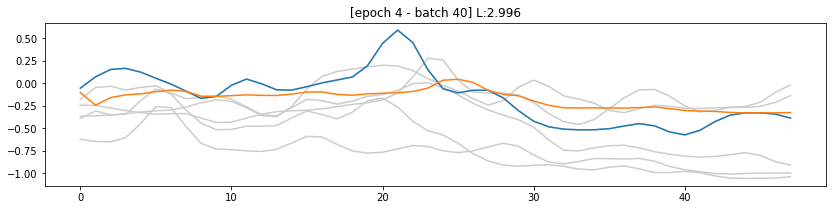

[5/16 : 41/41] - L2.69 (avg 3.04  40.4s)  
Eval loss: 6.8516          
LR 0.001


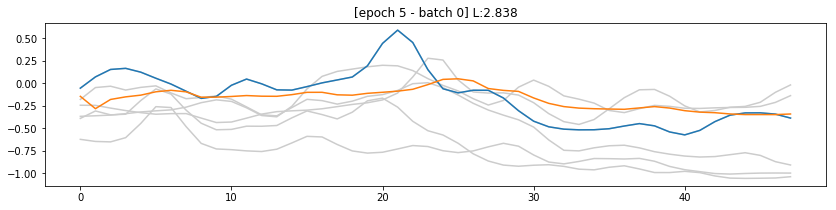

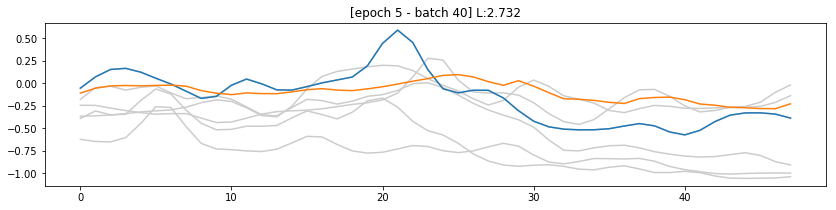

[6/16 : 41/41] - L3.45 (avg 2.72  42.5s)  
Eval loss: 6.9210           
LR 0.001


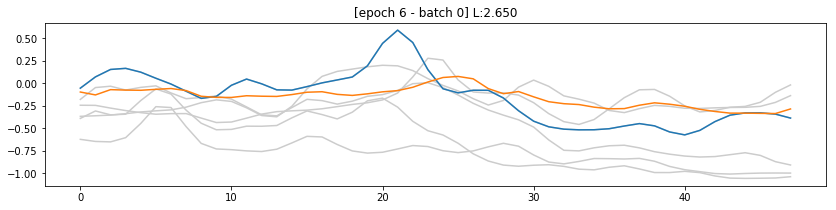

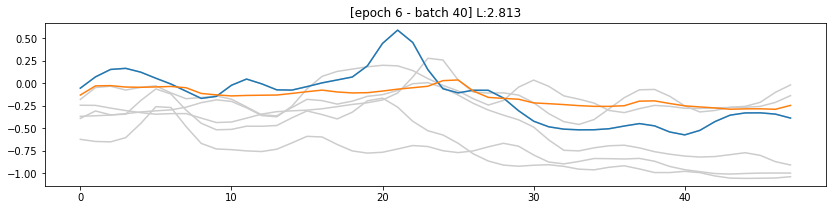

[7/16 : 41/41] - L2.93 (avg 2.60  41.1s)  
Eval loss: 6.9652          
LR 0.001


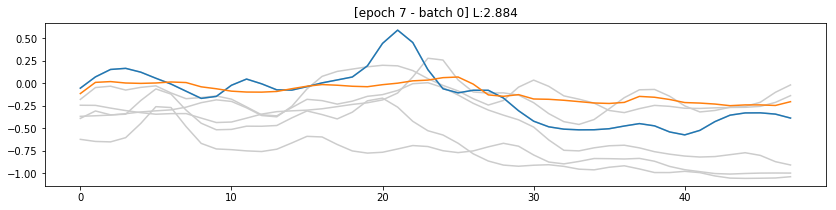

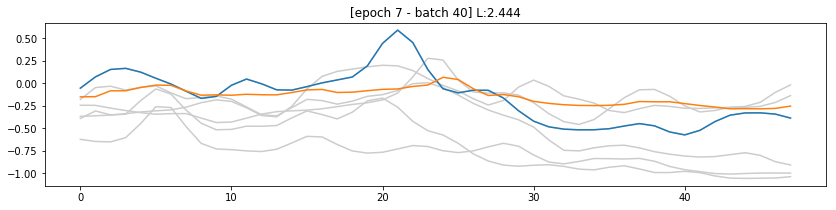

[8/16 : 41/41] - L2.62 (avg 2.53  40.6s)  
Eval loss: 6.5202          
LR 0.001


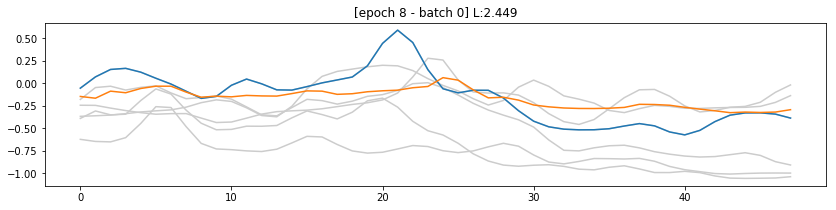

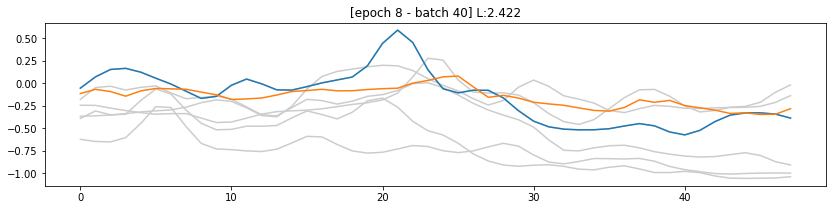

[9/16 : 41/41] - L1.99 (avg 2.44  40.4s)  
Eval loss: 6.5808           
LR 0.001


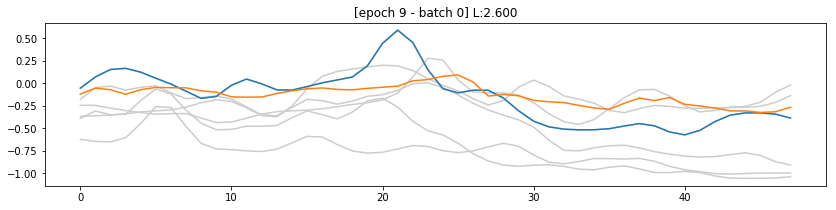

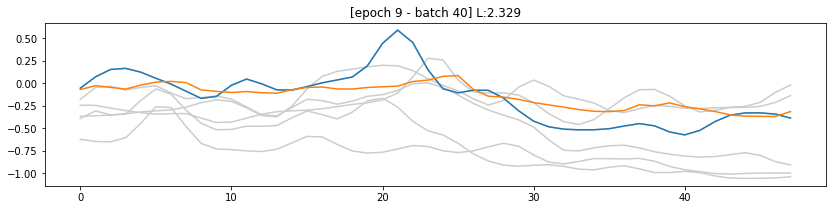

[10/16 : 41/41] - L2.20 (avg 2.35  41.9s)  
Eval loss: 6.4342          
LR 0.001


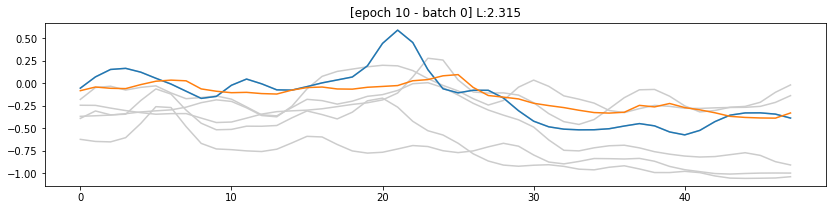

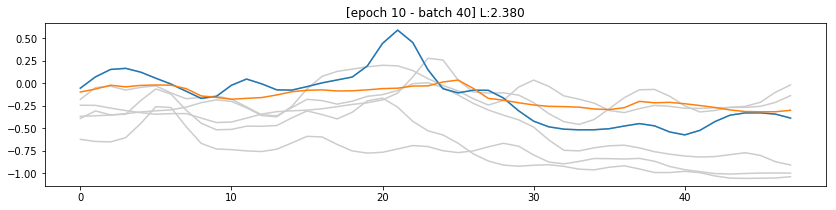

[11/16 : 41/41] - L2.05 (avg 2.34  40.8s)  
Eval loss: 6.9413           
LR 0.001


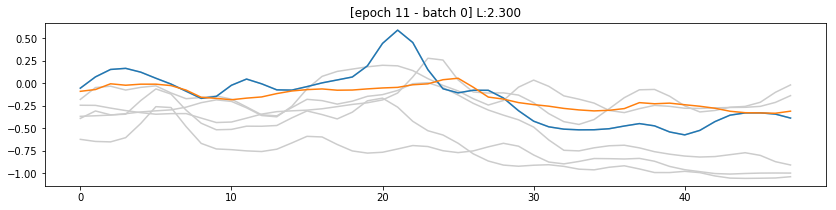

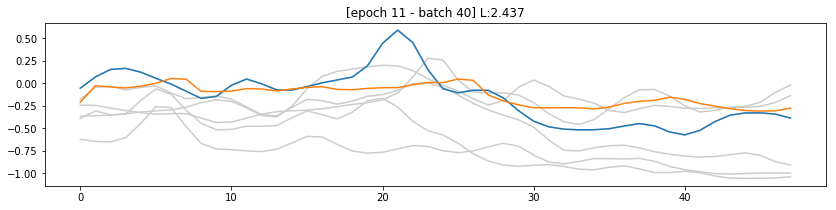

[12/16 : 41/41] - L2.74 (avg 2.30  42.0s)  
Eval loss: 6.4167           
LR 0.001


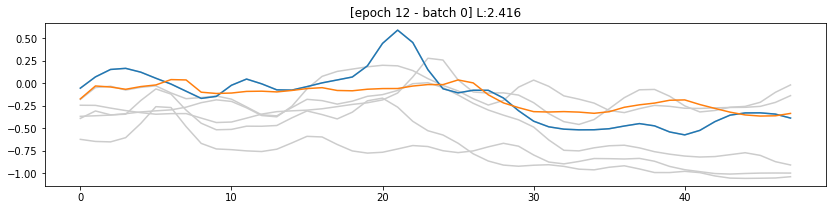

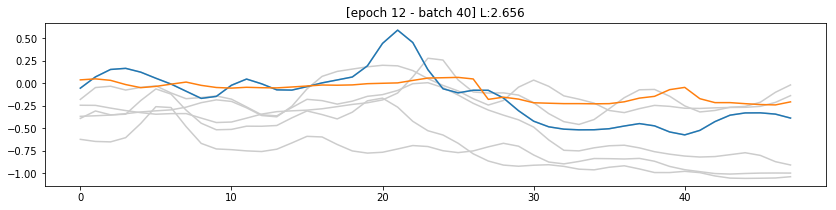

[13/16 : 41/41] - L2.23 (avg 2.33  40.9s)  
Eval loss: 6.4577          
LR 0.001


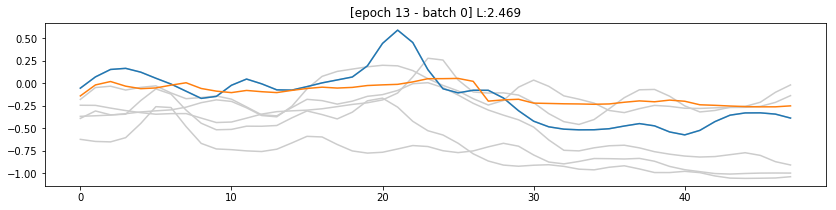

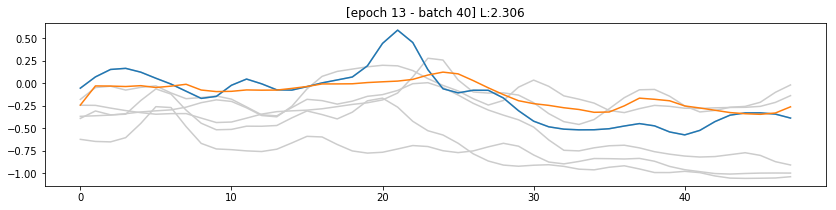

[14/16 : 41/41] - L2.32 (avg 2.20  40.9s)  
Eval loss: 6.9834           
LR 0.001


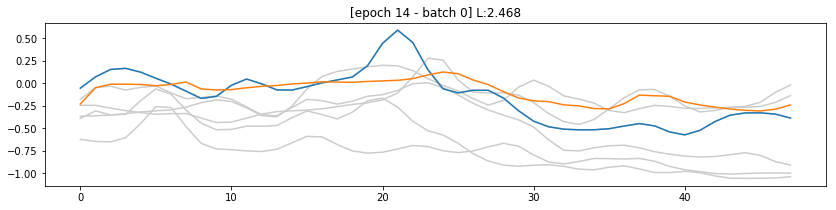

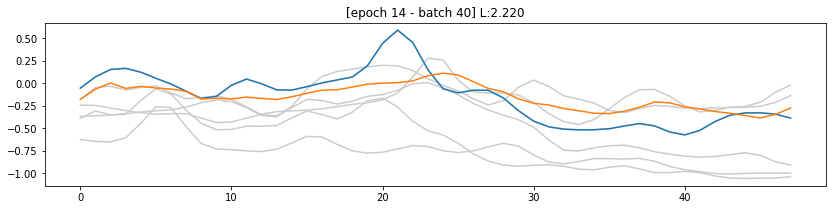

[15/16 : 41/41] - L2.07 (avg 2.19  42.7s)  
Eval loss: 6.4502          
LR 0.001


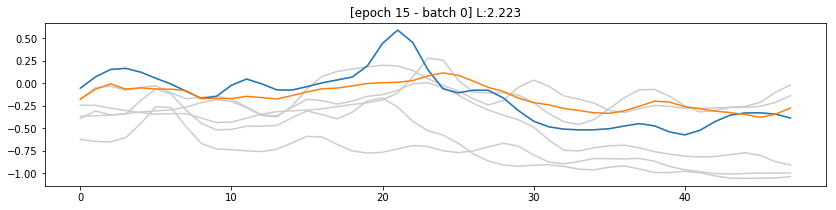

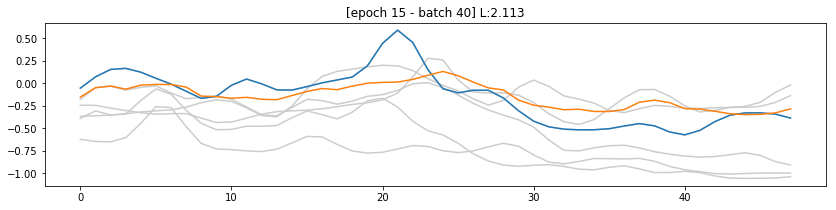

[16/16 : 41/41] - L1.75 (avg 2.02  42.3s)  
Eval loss: 6.6205          


In [12]:
opt = optim.Adam(model.parameters(), lr=0.001)
# sch = optim.lr_scheduler.StepLR(opt, step_size=2, gamma=0.1)
# sch.step()
plotbatch = None
for eii  in range(EPS):
#     sch.step()
    print('LR', get_lr(opt))
    
    bls = []
    t0 = time()
    for bii, batch in enumerate(dset):
        if bii % 40 == 0:
            if plotbatch is None:
                plotbatch = batch
            data = plotbatch.detach().cpu().numpy()
            with torch.no_grad():
                xdat, ytarg = model.format_batch(plotbatch)
                model.eval()
                yhat = model(xdat)
                loss = criterion(yhat, ytarg)
                model.train()
            
            plt.figure(figsize=(14, 3))
            plt.title('[epoch %d - batch %d] L:%.3f' % (eii, bii, loss.item() * 10**2))
            plt.plot(data[0, 1:, :], color='#CCCCCC')
            plt.plot(data[0, 1:, 0], color='C0')
            plt.plot(yhat[0, :, 0].detach().cpu().numpy(), color='C1')
            plt.show(); plt.close()
            
        model.train()
        Xs, Ys = model.format_batch(batch)
        outputs = model(Xs)
        
        opt.zero_grad()
        loss = criterion(outputs, Ys)
        loss.backward()
        opt.step()

        bls.append(loss.item())
        bmse = ''
        if bii == len(dset) - 1:
            bmse = (10 ** 2 * np.mean(bls))
            bmse = '(avg %.2f  %.1fs)' % (bmse, time() - t0)
        sys.stdout.write('[%d/%d : %d/%d] - L%.2f %s  \r' % (
            eii+1, EPS,
            bii+1, len(dset), 
            10**2 * loss.item(),
            bmse
        ))
    train_mse += bls
    sys.stdout.write('\n')

    last_eval = evf()
    if last_eval < best_eval:
#         model.save()
        best_eval = last_eval
    eval_mse.append(last_eval)
    
    sys.stdout.flush()

In [12]:
# model.save()

Saving to: /home/ubuntu/datasets-aux/checkpoints/mpfcast/400950-400951_n1.pth


In [17]:
testset = SpotHistory(SROUTE, 'test', 18, lag=LAG, res=10, shuffle=False, verbose=True)

Chunks (lag 25)
 [*] Segments: 90 co-avail
    * [400950-400951]: 90
    * [400951-403797]: 90
    * [404050-400950]: 90
    * [400948-404050]: 90
    * [403797-400953]: 90
    * [403797-405297]: 90
    * [400953-405297]: 90
    * [405297-404153]: 90
    * [400861-400948]: 90
 [*] Examples (test): 919
 [*] No missing: 919/1454
 [*] Time range: 2014-08-01 ~ 2014-10-31


In [20]:
def xfmt(datain):
    bynode = torch.split(datain.to(device).float().unsqueeze(1), 1, 2)
    return bynode

1 torch.Size([24, 9])


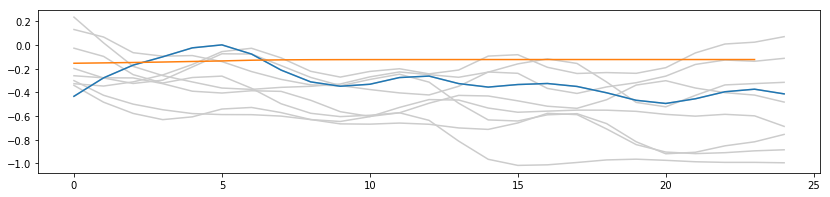

In [34]:
for ii in range(10):
    data = testset[ii]
#     print(data.shape)
    tens = torch.from_numpy(data).to(device).float().unsqueeze(0)
    Xs, _ = model.format_batch(tens)
    yhat = model(Xs)
    print(len(yhat), yhat[0].size())
    
    plt.figure(figsize=(14, 3))
    plt.plot(data, color='#CCCCCC')
    plt.plot(data[:, 0], color='C0')
    
    plt.plot(yhat[0, :, 0].detach().cpu().numpy(), color='C1')
    plt.show(); plt.close()
#     tonpy(yhat)
    
    break
#     print(Xs.size())

In [15]:
from utils import *
testset = SpotHistory(SROUTE, 'test', 18, lag=None, res=10, shuffle=False, verbose=True)

Full history
 [*] Segments: 90 co-avail
    * [400950-400951]: 90
    * [400951-403797]: 90
    * [404050-400950]: 90
    * [400948-404050]: 90
    * [403797-400953]: 90
    * [403797-405297]: 90
 [*] Examples (test): 18
 [*] Time range: 2014-08-01 ~ 2014-10-31


Using fringes: 3


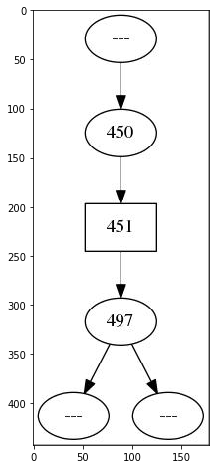

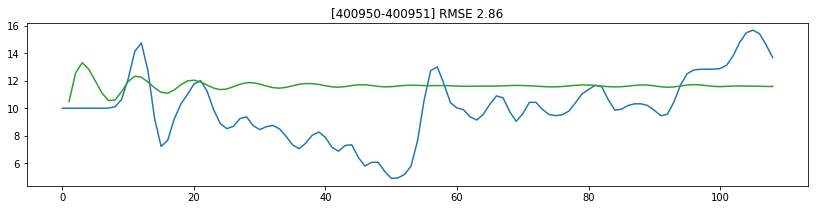

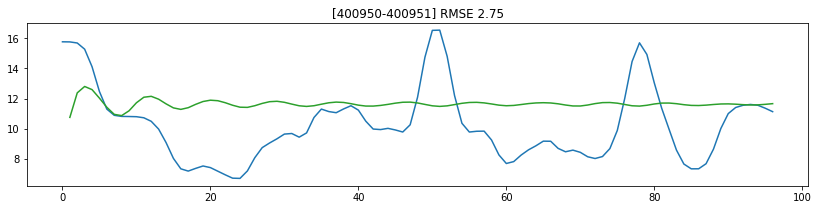

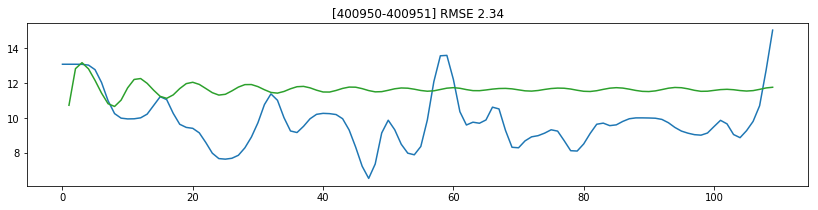

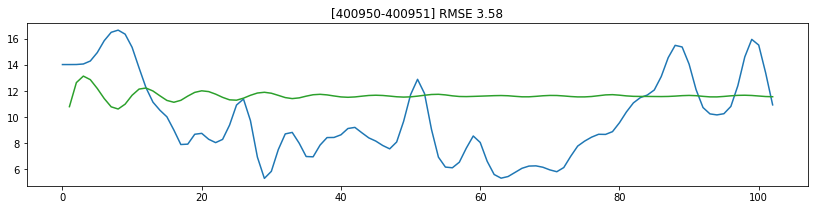

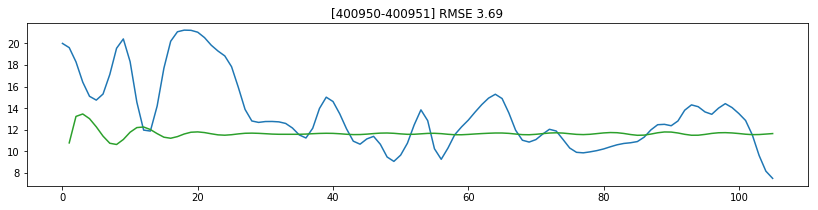

In [16]:
for ii in range(5):
    t0, tf = testset.trange[ii]
    
    _ = forecast_mprnn(
        testset[ii], model, graph_file, 
        twoway=True,
        verbose=ii is 0, plot=True)

In [ ]:
model.steps = len(SROUTE)
sqerr = eval_rnn(testset, model, plot=False, xfmt=xfmt)
print('Eval segments:', len(testset))
print('Eval MSE: %.4f' % np.mean(sqerr))

In [13]:
model.save()

Saving to: /home/ubuntu/datasets-aux/checkpoints/mpfcast/400950-400951_n2.pth
